# XGBoost - Lab

## Introduction

In this lab, we'll install the popular [XGBoost Library](http://xgboost.readthedocs.io/en/latest/index.html) and explore how to use this popular boosting model to classify different types of wine using the [Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/wine+quality) from the UCI Machine Learning Dataset Repository.  In this lesson, we'll install XGBoost on our machines, and then we'll use it make some classifications on the **_Wine Quality Dataset_**!

## Objectives

You will be able to:

* Understand the general difference between XGBoost and other ensemble algorithms such as AdaBoost
* Install and use XGboost

## Installing XGBoost

The XGBoost model is not currently included in scikit-learn, so we'll have to install it on our own.  To install XGBoost, you'll need to use conda. 

To install XGBoost, follow these steps:

1. Open up a new terminal window.
2. Activate your conda environment
3. Run `conda install py-xgboost`. You must use conda to install this package--currently, it cannot be installed using `pip`. 
4. Once installation has completed, run the cell below to verify that everything worked. 

In [1]:
import xgboost as xgb

Run the cell below to import everything we'll need for this lab. 

In [2]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

The dataset we'll be using for this lab is currently stored in the file `winequality-red.csv`.  

In the cell below, use pandas to import the dataset into a dataframe, and inspect the head of the dataframe to ensure everything loaded correctly. 

In [3]:
df = pd.read_csv('winequality-red.csv')

For this lab, our target variable will be `quality` .  That makes this a multiclass classification problem. Given the data in the columns from `fixed_acidity` through `alcohol`, we'll predict the `quality` of the wine.  

This means that we need to store our target variable separately from the dataset, and then split the data and labels into training and testing sets that we can use for cross-validation. 

In the cell below:

* Store the `quality` column in the `labels` variable and then remove the column from our dataset.  
* Create a `StandardScaler` object and scale the data using the `fit_transform()` method.
* Split the data into training and testing sets using the appropriate method from sklearn.  

In [4]:
labels = df.quality
labels_removed_df = df.drop('quality', axis=1)
scaler = StandardScaler()
scaled_df = scaler.fit_transform(labels_removed_df)

X_train, X_test, y_train, y_test = train_test_split(scaled_df, labels, stratify=labels)

Now that we have prepared our data for modeling, we can use XGBoost to build a model that can accurately classify wine quality based on the features of the wine!

The API for xgboost is purposefully written to mirror the same structure as other models in scikit-learn.  

In [5]:
clf = xgb.XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
clf.fit(X_train, y_train, eval_set= eval_set, early_stopping_rounds=10)
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

[0]	validation_0-merror:0.377815	validation_1-merror:0.405
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.371977	validation_1-merror:0.4125
[2]	validation_0-merror:0.374479	validation_1-merror:0.415
[3]	validation_0-merror:0.371143	validation_1-merror:0.42
[4]	validation_0-merror:0.370309	validation_1-merror:0.425
[5]	validation_0-merror:0.373645	validation_1-merror:0.4225
[6]	validation_0-merror:0.353628	validation_1-merror:0.4225
[7]	validation_0-merror:0.354462	validation_1-merror:0.43
[8]	validation_0-merror:0.351126	validation_1-merror:0.4325
[9]	validation_0-merror:0.346956	validation_1-merror:0.435
[10]	validation_0-merror:0.344454	validation_1-merror:0.43
Stopping. Best iteration:
[0]	validation_0-merror:0.377815	validation_1-merror:0.405

Training Accuracy: 65.55%
Validation accuracy: 57.0%


# Tuning XGBoost

Our model had somewhat lackluster performance on the testing set compared to the training set, suggesting the model is beginning to overfit the training data.  Let's tune the model to increase the model performance and prevent overfitting. 

For a full list of model parameters, see the [XGBoost Documentation](http://xgboost.readthedocs.io/en/latest/parameter.html).

Many of the parameters we'll be tuning are parameters we've already encountered when working with Decision Trees, Random Forests, and Gradient Boosted Trees.  

Examine the tunable parameters for XGboost, and then fill in appropriate values for the `param_grid` dictionary in the cell below. Put values you want to test out  for each parameter inside the corresponding arrays in `param_grid`.  

**_NOTE:_** Remember, `GridSearchCV` finds the optimal combination of parameters through an exhaustive combinatoric search.  If you search through too many parameters, the model will take forever to run! For the sake of time, we recommend trying no more than 3 values per parameter for the following steps.  

In [10]:
c
#'subsample': [.7]

Now that we have constructed our `params` dictionary, create a `GridSearchCV` object in the cell below and use it to iterate tune our XGBoost model.  

Now, in the cell below:

* Create a `GridSearchCV` object. Pass in the following parameters:
    * `clf`, our classifier
    * `param_grid`, the dictionary of parameters we're going to grid search through
    * `scoring='accuracy'`
    * `cv=None`
    * `n_jobs=1`
* Fit our `grid_clf` object and pass in `X_train` and `y_train`
* Store the best parameter combination found by the grid search in `best_parameters`. You can find these inside the Grid Search object's `.best_params_` attribute.
* Use `grid_clf` to create predictions for the training and testing sets, and store them in separate variables. 
* Compute the accuracy score for the training and testing predictions. 

In [11]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
eval_metric = ["auc", 'error']
eval_set = [(X_train, y_train), (X_test, y_test)]
grid_clf.fit(X_train, y_train, eval_set= eval_set, early_stopping_rounds=10)
best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

[0]	validation_0-merror:0.341118	validation_1-merror:0.4
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.317765	validation_1-merror:0.395
[2]	validation_0-merror:0.289408	validation_1-merror:0.3625
[3]	validation_0-merror:0.28774	validation_1-merror:0.3675
[4]	validation_0-merror:0.261051	validation_1-merror:0.37
[5]	validation_0-merror:0.233528	validation_1-merror:0.345
[6]	validation_0-merror:0.221018	validation_1-merror:0.355
[7]	validation_0-merror:0.217681	validation_1-merror:0.3675
[8]	validation_0-merror:0.201001	validation_1-merror:0.37
[9]	validation_0-merror:0.187656	validation_1-merror:0.3675
[10]	validation_0-merror:0.178482	validation_1-merror:0.3675
[11]	validation_0-merror:0.17181	validation_1-merror:0.3625
[12]	validation_0-merror:0.165972	validation_1-merror:0.37
[13]	validation_0-merror:0.165972	validation_1-merror:0.38
[14]	vali

/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[12]	validation_0-merror:0.175146	validation_1-merror:0.37
[13]	validation_0-merror:0.16764	validation_1-merror:0.36
[14]	validation_0-merror:0.16347	validation_1-merror:0.3575
[15]	validation_0-merror:0.165138	validation_1-merror:0.3625
[16]	validation_0-merror:0.155129	validation_1-merror:0.36
[17]	validation_0-merror:0.150959	validation_1-merror:0.3725
[18]	validation_0-merror:0.154295	validation_1-merror:0.3675
[19]	validation_0-merror:0.148457	validation_1-merror:0.3725
[20]	validation_0-merror:0.146789	validation_1-merror:0.375
[21]	validation_0-merror:0.143453	validation_1-merror:0.35
[22]	validation_0-merror:0.145121	validation_1-merror:0.3625
[23]	validation_0-merror:0.136781	validation_1-merror:0.3625
[24]	validation_0-merror:0.137615	validation_1-merror:0.36
[25]	validation_0-merror:0.139283	validation_1-merror:0.365
[26]	validation_0-merror:0.141785	validation_1-merror:0.365
[27]	validation_0-merror:0.135113	validation_1-merror:0.355
[28]	validation_0-merror:0.133445	valida

[3]	validation_0-merror:0.293578	validation_1-merror:0.38
[4]	validation_0-merror:0.284404	validation_1-merror:0.3775
[5]	validation_0-merror:0.270225	validation_1-merror:0.37
[6]	validation_0-merror:0.256881	validation_1-merror:0.37
[7]	validation_0-merror:0.245204	validation_1-merror:0.3925
[8]	validation_0-merror:0.241868	validation_1-merror:0.39
[9]	validation_0-merror:0.234362	validation_1-merror:0.39
[10]	validation_0-merror:0.216847	validation_1-merror:0.3775
[11]	validation_0-merror:0.210175	validation_1-merror:0.3575
[12]	validation_0-merror:0.206839	validation_1-merror:0.355
[13]	validation_0-merror:0.192661	validation_1-merror:0.3625
[14]	validation_0-merror:0.186822	validation_1-merror:0.3675
[15]	validation_0-merror:0.182652	validation_1-merror:0.3775
[16]	validation_0-merror:0.176814	validation_1-merror:0.36
[17]	validation_0-merror:0.173478	validation_1-merror:0.3675
[18]	validation_0-merror:0.172644	validation_1-merror:0.37
[19]	validation_0-merror:0.166806	validation_1

[13]	validation_0-merror:0.150959	validation_1-merror:0.3325
[14]	validation_0-merror:0.143453	validation_1-merror:0.33
[15]	validation_0-merror:0.135113	validation_1-merror:0.3475
[16]	validation_0-merror:0.130942	validation_1-merror:0.3425
[17]	validation_0-merror:0.132611	validation_1-merror:0.345
[18]	validation_0-merror:0.126772	validation_1-merror:0.345
[19]	validation_0-merror:0.127606	validation_1-merror:0.3425
[20]	validation_0-merror:0.12427	validation_1-merror:0.345
Stopping. Best iteration:
[10]	validation_0-merror:0.170976	validation_1-merror:0.32

[0]	validation_0-merror:0.349458	validation_1-merror:0.4075
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.29608	validation_1-merror:0.38
[2]	validation_0-merror:0.282736	validation_1-merror:0.4025
[3]	validation_0-merror:0.268557	validation_1-merror:0.3925
[4]	validation_0-merror:0.250208

[13]	validation_0-merror:0.170142	validation_1-merror:0.365
[14]	validation_0-merror:0.17181	validation_1-merror:0.3625
[15]	validation_0-merror:0.17181	validation_1-merror:0.35
[16]	validation_0-merror:0.160133	validation_1-merror:0.3575
[17]	validation_0-merror:0.154295	validation_1-merror:0.3625
[18]	validation_0-merror:0.150959	validation_1-merror:0.35
[19]	validation_0-merror:0.148457	validation_1-merror:0.3575
[20]	validation_0-merror:0.146789	validation_1-merror:0.35
[21]	validation_0-merror:0.139283	validation_1-merror:0.365
[22]	validation_0-merror:0.143453	validation_1-merror:0.36
[23]	validation_0-merror:0.140951	validation_1-merror:0.3575
[24]	validation_0-merror:0.140951	validation_1-merror:0.3675
[25]	validation_0-merror:0.139283	validation_1-merror:0.36
Stopping. Best iteration:
[15]	validation_0-merror:0.17181	validation_1-merror:0.35

[0]	validation_0-merror:0.367806	validation_1-merror:0.4275
Multiple eval metrics have been passed: 'validation_1-merror' will be used f

[12]	validation_0-merror:0.16764	validation_1-merror:0.3625
[13]	validation_0-merror:0.158465	validation_1-merror:0.355
[14]	validation_0-merror:0.157631	validation_1-merror:0.3525
[15]	validation_0-merror:0.152627	validation_1-merror:0.3575
[16]	validation_0-merror:0.149291	validation_1-merror:0.365
[17]	validation_0-merror:0.149291	validation_1-merror:0.3675
[18]	validation_0-merror:0.147623	validation_1-merror:0.375
[19]	validation_0-merror:0.143453	validation_1-merror:0.3675
[20]	validation_0-merror:0.141785	validation_1-merror:0.3575
[21]	validation_0-merror:0.139283	validation_1-merror:0.36
[22]	validation_0-merror:0.140117	validation_1-merror:0.3625
[23]	validation_0-merror:0.140951	validation_1-merror:0.3525
[24]	validation_0-merror:0.140951	validation_1-merror:0.35
[25]	validation_0-merror:0.138449	validation_1-merror:0.355
[26]	validation_0-merror:0.135113	validation_1-merror:0.36
[27]	validation_0-merror:0.134279	validation_1-merror:0.3625
[28]	validation_0-merror:0.132611	v

[24]	validation_0-merror:0.140117	validation_1-merror:0.3675
Stopping. Best iteration:
[14]	validation_0-merror:0.16347	validation_1-merror:0.35

[0]	validation_0-merror:0.367806	validation_1-merror:0.4275
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.320267	validation_1-merror:0.3825
[2]	validation_0-merror:0.281068	validation_1-merror:0.365
[3]	validation_0-merror:0.267723	validation_1-merror:0.3575
[4]	validation_0-merror:0.254379	validation_1-merror:0.36
[5]	validation_0-merror:0.23186	validation_1-merror:0.3625
[6]	validation_0-merror:0.22352	validation_1-merror:0.3525
[7]	validation_0-merror:0.210175	validation_1-merror:0.3475
[8]	validation_0-merror:0.199333	validation_1-merror:0.34
[9]	validation_0-merror:0.186822	validation_1-merror:0.33
[10]	validation_0-merror:0.181818	validation_1-merror:0.335
[11]	validation_0-merror:0.175146	valida

[9]	validation_0-merror:0.177648	validation_1-merror:0.3775
[10]	validation_0-merror:0.166806	validation_1-merror:0.38
[11]	validation_0-merror:0.168474	validation_1-merror:0.3775
[12]	validation_0-merror:0.156797	validation_1-merror:0.3825
[13]	validation_0-merror:0.145955	validation_1-merror:0.3775
[14]	validation_0-merror:0.143453	validation_1-merror:0.375
[15]	validation_0-merror:0.145955	validation_1-merror:0.395
[16]	validation_0-merror:0.145121	validation_1-merror:0.3875
[17]	validation_0-merror:0.145121	validation_1-merror:0.4025
[18]	validation_0-merror:0.140117	validation_1-merror:0.405
Stopping. Best iteration:
[8]	validation_0-merror:0.195163	validation_1-merror:0.3725

[0]	validation_0-merror:0.3603	validation_1-merror:0.4175
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.345288	validation_1-merror:0.4
[2]	validation_0-merror:0.31693

[22]	validation_0-merror:0.130942	validation_1-merror:0.335
[23]	validation_0-merror:0.131776	validation_1-merror:0.335
[24]	validation_0-merror:0.130942	validation_1-merror:0.34
[25]	validation_0-merror:0.131776	validation_1-merror:0.3375
[26]	validation_0-merror:0.127606	validation_1-merror:0.335
Stopping. Best iteration:
[16]	validation_0-merror:0.153461	validation_1-merror:0.3275

[0]	validation_0-merror:0.331109	validation_1-merror:0.405
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.301084	validation_1-merror:0.3725
[2]	validation_0-merror:0.273561	validation_1-merror:0.37
[3]	validation_0-merror:0.235196	validation_1-merror:0.3775
[4]	validation_0-merror:0.206839	validation_1-merror:0.3525
[5]	validation_0-merror:0.191827	validation_1-merror:0.3525
[6]	validation_0-merror:0.179316	validation_1-merror:0.35
[7]	validation_0-merror:0.160967	v

[9]	validation_0-merror:0.162636	validation_1-merror:0.345
[10]	validation_0-merror:0.146789	validation_1-merror:0.3325
[11]	validation_0-merror:0.137615	validation_1-merror:0.345
[12]	validation_0-merror:0.132611	validation_1-merror:0.335
[13]	validation_0-merror:0.133445	validation_1-merror:0.355
[14]	validation_0-merror:0.126772	validation_1-merror:0.355
[15]	validation_0-merror:0.12844	validation_1-merror:0.355
[16]	validation_0-merror:0.131776	validation_1-merror:0.35
[17]	validation_0-merror:0.126772	validation_1-merror:0.3525
[18]	validation_0-merror:0.122602	validation_1-merror:0.3625
[19]	validation_0-merror:0.12427	validation_1-merror:0.355
[20]	validation_0-merror:0.125104	validation_1-merror:0.35
Stopping. Best iteration:
[10]	validation_0-merror:0.146789	validation_1-merror:0.3325

[0]	validation_0-merror:0.351126	validation_1-merror:0.385
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror ha

[21]	validation_0-merror:0.142619	validation_1-merror:0.34
[22]	validation_0-merror:0.140951	validation_1-merror:0.33
[23]	validation_0-merror:0.139283	validation_1-merror:0.3325
[24]	validation_0-merror:0.140951	validation_1-merror:0.345
[25]	validation_0-merror:0.144287	validation_1-merror:0.335
[26]	validation_0-merror:0.141785	validation_1-merror:0.3375
[27]	validation_0-merror:0.142619	validation_1-merror:0.345
[28]	validation_0-merror:0.144287	validation_1-merror:0.3475
[29]	validation_0-merror:0.142619	validation_1-merror:0.35
[30]	validation_0-merror:0.142619	validation_1-merror:0.345
[31]	validation_0-merror:0.140951	validation_1-merror:0.3375
[32]	validation_0-merror:0.141785	validation_1-merror:0.3475
Stopping. Best iteration:
[22]	validation_0-merror:0.140951	validation_1-merror:0.33

[0]	validation_0-merror:0.328607	validation_1-merror:0.375
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror 

[5]	validation_0-merror:0.214345	validation_1-merror:0.415
[6]	validation_0-merror:0.204337	validation_1-merror:0.4175
[7]	validation_0-merror:0.18849	validation_1-merror:0.4
[8]	validation_0-merror:0.186822	validation_1-merror:0.4125
[9]	validation_0-merror:0.17598	validation_1-merror:0.4125
[10]	validation_0-merror:0.170142	validation_1-merror:0.39
[11]	validation_0-merror:0.165138	validation_1-merror:0.4025
[12]	validation_0-merror:0.160967	validation_1-merror:0.405
[13]	validation_0-merror:0.160133	validation_1-merror:0.395
[14]	validation_0-merror:0.158465	validation_1-merror:0.3925
[15]	validation_0-merror:0.157631	validation_1-merror:0.4025
[16]	validation_0-merror:0.151793	validation_1-merror:0.3925
[17]	validation_0-merror:0.152627	validation_1-merror:0.3925
[18]	validation_0-merror:0.147623	validation_1-merror:0.4025
[19]	validation_0-merror:0.145121	validation_1-merror:0.3925
[20]	validation_0-merror:0.147623	validation_1-merror:0.3925
Stopping. Best iteration:
[10]	validati

[24]	validation_0-merror:0.238532	validation_1-merror:0.34
[25]	validation_0-merror:0.237698	validation_1-merror:0.3375
[26]	validation_0-merror:0.236864	validation_1-merror:0.3375
[27]	validation_0-merror:0.23603	validation_1-merror:0.3325
[28]	validation_0-merror:0.23186	validation_1-merror:0.335
[29]	validation_0-merror:0.231026	validation_1-merror:0.3375
[30]	validation_0-merror:0.228524	validation_1-merror:0.3275
[31]	validation_0-merror:0.22769	validation_1-merror:0.33
[32]	validation_0-merror:0.228524	validation_1-merror:0.33
[33]	validation_0-merror:0.225188	validation_1-merror:0.3225
[34]	validation_0-merror:0.219349	validation_1-merror:0.33
[35]	validation_0-merror:0.220183	validation_1-merror:0.325
[36]	validation_0-merror:0.215179	validation_1-merror:0.3275
[37]	validation_0-merror:0.216013	validation_1-merror:0.3225
[38]	validation_0-merror:0.211843	validation_1-merror:0.3225
[39]	validation_0-merror:0.211843	validation_1-merror:0.3275
[40]	validation_0-merror:0.208507	val

Will train until validation_1-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.354462	validation_1-merror:0.395
[2]	validation_0-merror:0.342786	validation_1-merror:0.4075
[3]	validation_0-merror:0.338616	validation_1-merror:0.42
[4]	validation_0-merror:0.330275	validation_1-merror:0.4225
[5]	validation_0-merror:0.334445	validation_1-merror:0.4075
[6]	validation_0-merror:0.322769	validation_1-merror:0.4
[7]	validation_0-merror:0.318599	validation_1-merror:0.3975
[8]	validation_0-merror:0.320267	validation_1-merror:0.4075
[9]	validation_0-merror:0.306922	validation_1-merror:0.395
[10]	validation_0-merror:0.30442	validation_1-merror:0.39
Stopping. Best iteration:
[0]	validation_0-merror:0.366972	validation_1-merror:0.39

[0]	validation_0-merror:0.368641	validation_1-merror:0.4325
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.338616	v

[29]	validation_0-merror:0.198499	validation_1-merror:0.3325
[30]	validation_0-merror:0.197665	validation_1-merror:0.335
[31]	validation_0-merror:0.192661	validation_1-merror:0.33
[32]	validation_0-merror:0.18849	validation_1-merror:0.325
[33]	validation_0-merror:0.187656	validation_1-merror:0.3325
[34]	validation_0-merror:0.189324	validation_1-merror:0.335
[35]	validation_0-merror:0.18849	validation_1-merror:0.335
[36]	validation_0-merror:0.190158	validation_1-merror:0.325
Stopping. Best iteration:
[26]	validation_0-merror:0.206005	validation_1-merror:0.3225

[0]	validation_0-merror:0.349458	validation_1-merror:0.4075
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.340284	validation_1-merror:0.395
[2]	validation_0-merror:0.319433	validation_1-merror:0.38
[3]	validation_0-merror:0.310259	validation_1-merror:0.375
[4]	validation_0-merror:0.30025	va

[18]	validation_0-merror:0.257715	validation_1-merror:0.3925
[19]	validation_0-merror:0.259383	validation_1-merror:0.3975
[20]	validation_0-merror:0.259383	validation_1-merror:0.395
[21]	validation_0-merror:0.256047	validation_1-merror:0.39
Stopping. Best iteration:
[11]	validation_0-merror:0.271893	validation_1-merror:0.3775

[0]	validation_0-merror:0.36447	validation_1-merror:0.4275
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.365304	validation_1-merror:0.4275
[2]	validation_0-merror:0.344454	validation_1-merror:0.425
[3]	validation_0-merror:0.328607	validation_1-merror:0.42
[4]	validation_0-merror:0.318599	validation_1-merror:0.415
[5]	validation_0-merror:0.319433	validation_1-merror:0.4275
[6]	validation_0-merror:0.316097	validation_1-merror:0.4275
[7]	validation_0-merror:0.305254	validation_1-merror:0.41
[8]	validation_0-merror:0.297748	va

Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.309425	validation_1-merror:0.3975
[2]	validation_0-merror:0.310259	validation_1-merror:0.3775
[3]	validation_0-merror:0.285238	validation_1-merror:0.3875
[4]	validation_0-merror:0.275229	validation_1-merror:0.3825
[5]	validation_0-merror:0.267723	validation_1-merror:0.375
[6]	validation_0-merror:0.259383	validation_1-merror:0.3725
[7]	validation_0-merror:0.265221	validation_1-merror:0.3625
[8]	validation_0-merror:0.255213	validation_1-merror:0.365
[9]	validation_0-merror:0.256047	validation_1-merror:0.36
[10]	validation_0-merror:0.246038	validation_1-merror:0.3425
[11]	validation_0-merror:0.242702	validation_1-merror:0.3475
[12]	validation_0-merror:0.241034	validation_1-merror:0.3525
[13]	validation_0-merror:0.236864	validation_1-merror:0.345
[14]	validation_0-merror:0.236864	validation_1-merror:0.34

[0]	validation_0-merror:0.345288	validation_1-merror:0.4125
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.333611	validation_1-merror:0.405
[2]	validation_0-merror:0.322769	validation_1-merror:0.39
[3]	validation_0-merror:0.313595	validation_1-merror:0.39
[4]	validation_0-merror:0.308591	validation_1-merror:0.4175
[5]	validation_0-merror:0.295246	validation_1-merror:0.3825
[6]	validation_0-merror:0.295246	validation_1-merror:0.38
[7]	validation_0-merror:0.291076	validation_1-merror:0.3775
[8]	validation_0-merror:0.28774	validation_1-merror:0.38
[9]	validation_0-merror:0.281902	validation_1-merror:0.3825
[10]	validation_0-merror:0.275229	validation_1-merror:0.385
[11]	validation_0-merror:0.274395	validation_1-merror:0.3875
[12]	validation_0-merror:0.272727	validation_1-merror:0.39
[13]	validation_0-merror:0.271893	validation_1-merror:0.38
[14]	val

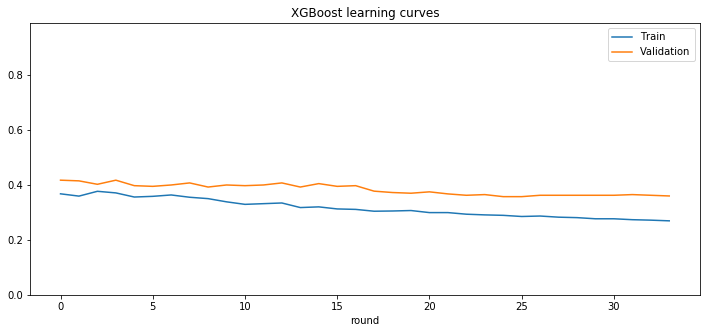

In [58]:
evals_result = clf.evals_result()
train_errors = evals_result['validation_0']['merror']
validation_errors = evals_result['validation_1']['merror']
df= pd.DataFrame([train_errors, validation_errors]).T
df.columns = ['Train', 'Validation']
df.index.name = 'round'
df.plot(title='XGBoost learning curves', ylim=(0,.99), figsize=(12,5))

That's a big improvement! You should see that your accuracy has increased by 10-15%, as well as no more signs of the model overfitting.  

## Summary

Great! We've now successfully made use of one of the most powerful Boosting models in data science for modeling.  We've also learned how to tune the model for better performance using the Grid Search methodology we learned previously.  XGBoost is a powerful modeling tool to have in your arsenal.  Don't be afraid to experiment with it when modeling.